### Benchmark Tests For API Performance

In [25]:
import requests, time, statistics

base_url = 'https://tmysticastats-api-production.up.railway.app/api'

factions_url = '/api/factions'
maps_url = '/api/maps'
tiles_url = '/api/tiles'
trends_url = '/api/trends'
predi_url = '/api/'

url_extensions = {
    '/factions': {
        'endpoints': [
            '/faction-wr', '/faction-pickrate',
            '/faction-wr-versus', '/faction-wr-maps',
            '/faction-avg-vp', '/faction-avg-vp-per-round',
            '/faction-games-played', '/faction-popularity-ot',
            '/wr-by-playercount'
        ],
        'params': {
            's_year': 2014,
            'e_year': 2025,
            'faction': 'darklings'
        }
    },

    '/maps': {
        'endpoints': [
            '/games-per-map', '/avg-players-per-map',
            '/faction-pickrate', '/faction-winrate',
            '/avg-vp-per-map', '/performance-variation'
        ],
        'params': {
            's_year': 2014,
            'e_year': 2025,
            'map_id': '126fe960806d587c78546b30f1a90853b1ada468'
        }
    },

    '/tiles': {
        'endpoints': [
            '/score-tile-freq', '/bonus-tile-pop',
            '/favor-tiles-by-faction', '/town-tiles-by-faction',
            '/vp-gained-by-score-tile'
        ],
        'params': {
            's_year': 2014,
            'e_year': 2025
        }
    },

    '/trends': {
        'endpoints': [
            '/win-rate-ot', '/pick-rate-ot',
            '/map-picks-ot', '/played-games-ot'
        ],
        'params': {
            's_year': 2014,
            'e_year': 2025
        }
    },

    '/predictions': {
        'endpoints': ['/win_prediction'],
        'params': {
            'num_players': 4,
            'map_id': '126fe960806d587c78546b30f1a90853b1ada468'.upper(),
            'bonus_tiles': [f'BON{i+1}' for i in range(7)],
            'score_tiles': [f'SCORE{i+1}' for i in range(6)]
        }
    }
}


In [45]:

def run_benchmarks():
    results = {key: [] for key in url_extensions.keys()}

    for route in url_extensions:
        if route != '/predictions':
            for endpoint in url_extensions[route]['endpoints']:
                query_string = '&'.join(
                    f'{key}={val}' for key, val in url_extensions[route]['params'].items()
                )
                request_url = f'{base_url}{route}{endpoint}?{query_string}'

                for _ in range(10):
                    start = time.time()
                    response = requests.get(request_url)
                    end = time.time()
                    print(f'{endpoint}: Success! ({response.status_code})')
                    results[route].append(end - start)

        else:
            endpoint = '/win_prediction'
            pred_params = url_extensions[route]['params']

            num_players = f"num_players={pred_params['num_players']}"
            map_id = f"map_id={pred_params['map_id']}"
            bonus_tiles = '&'.join(f'bonus_tiles={tile}' for tile in pred_params['bonus_tiles'])
            score_tiles = '&'.join(f'score_tiles={tile}' for tile in pred_params['score_tiles'])

            parts = [num_players, map_id, bonus_tiles, score_tiles]
            query_string = '&'.join(p for p in parts if p)

            request_url = f"{base_url}{route}{endpoint}?{query_string}"
            print(request_url)

            for _ in range(10):
                start = time.time()
                response = requests.get(request_url)
                end = time.time()
                print(f'{endpoint}: Success! ({response.status_code})')
                results[route].append(end - start)

    return results


In [46]:
times = run_benchmarks()
print(times)

/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-wr: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-pickrate: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-versus: Success! (200)
/faction-wr-maps: Success! (20

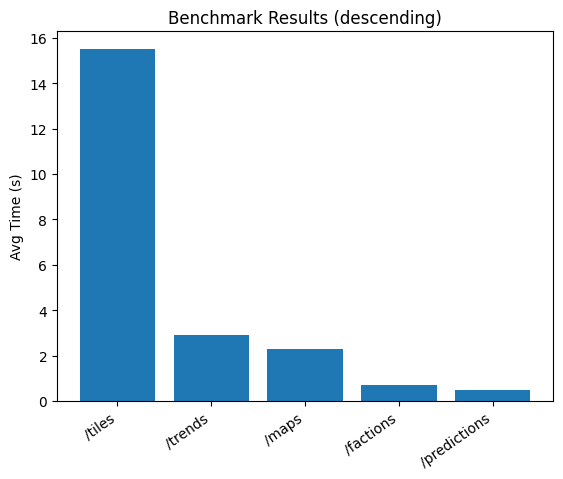

In [55]:
import statistics
import matplotlib.pyplot as plt

averages = [(route, statistics.mean(lst)) for route, lst in times.items() if lst]

averages.sort(key=lambda x: x[1], reverse=True)

x, y = zip(*averages)

plt.bar(x, y)
plt.xticks(rotation=35, ha='right')
plt.ylabel("Avg Time (s)")
plt.title("Benchmark Results (descending)")
plt.show()

In [63]:
def benchmark_tile_endpoints():
    results = {key: [] for key in url_extensions['/tiles']['endpoints']}

    for endpoint in url_extensions['/tiles']['endpoints']:
        query_string = '&'.join(
                    f'{key}={val}' for key, val in url_extensions['/tiles']['params'].items()
                )
        request_url = f'{base_url}/tiles{endpoint}?{query_string}'

        for _ in range(5):
            start = time.time()
            response = requests.get(request_url)
            end = time.time()
            print(f'{endpoint}: Success! ({response.status_code})')
            results[endpoint].append(end - start)

    return results


In [64]:

tile_results = benchmark_tile_endpoints()
print(tile_results)

/score-tile-freq: Success! (200)
/score-tile-freq: Success! (200)
/score-tile-freq: Success! (200)
/score-tile-freq: Success! (200)
/score-tile-freq: Success! (200)
/bonus-tile-pop: Success! (200)
/bonus-tile-pop: Success! (200)
/bonus-tile-pop: Success! (200)
/bonus-tile-pop: Success! (200)
/bonus-tile-pop: Success! (200)
/favor-tiles-by-faction: Success! (200)
/favor-tiles-by-faction: Success! (200)
/favor-tiles-by-faction: Success! (200)
/favor-tiles-by-faction: Success! (200)
/favor-tiles-by-faction: Success! (200)
/town-tiles-by-faction: Success! (200)
/town-tiles-by-faction: Success! (200)
/town-tiles-by-faction: Success! (200)
/town-tiles-by-faction: Success! (200)
/town-tiles-by-faction: Success! (200)
/vp-gained-by-score-tile: Success! (200)
/vp-gained-by-score-tile: Success! (200)
/vp-gained-by-score-tile: Success! (200)
/vp-gained-by-score-tile: Success! (200)
/vp-gained-by-score-tile: Success! (200)
{'/score-tile-freq': [5.468604326248169, 5.611557483673096, 5.5329072475433

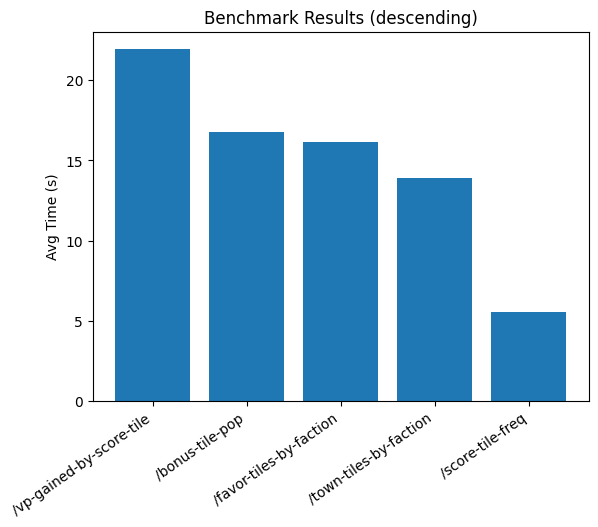

In [65]:
tile_averages = [(route, statistics.mean(lst)) for route, lst in tile_results.items() if lst]

tile_averages.sort(key=lambda x: x[1], reverse=True)

x, y = zip(*tile_averages)

plt.bar(x, y)
plt.xticks(rotation=35, ha='right')
plt.ylabel("Avg Time (s)")
plt.title("Benchmark Results (descending)")
plt.show()